In [46]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu')

In [47]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)                                                                      
print(train_input.shape)
print(train_scaled.shape)

(60000, 28, 28)
(48000, 28, 28, 1)


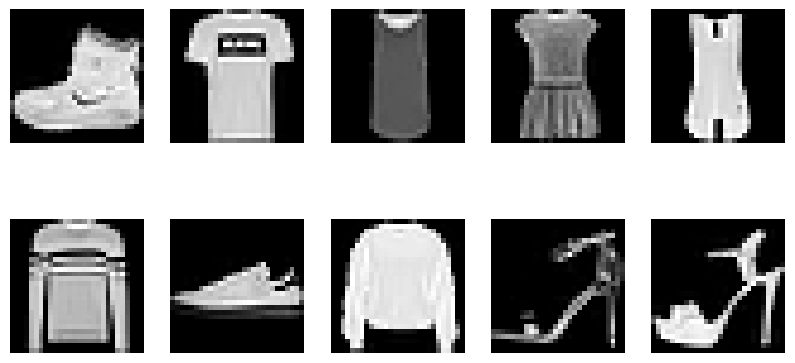

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_input[i], cmap='gray')
    plt.axis('off')
plt.show()

## 합성곱 신경망 만들기

In [49]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu',
                              padding = 'same', input_shape = (28, 28 ,1)))

In [50]:
model.add(keras.layers.MaxPooling2D(2))

패션 MNIST 이미지가 (2, 28) 크기에 세임 패딩을 적용했기 때문에 합성곱 층에서 출력된 특성 맵의 가로세로 크기는 입력과 동일함.

그 다음 (2, 2)풀링을 적용했으므로 특성 맵의 크기는 절반으로 줄어듬.

합성곱 층에서 32개의 필터를 사용했기 때문에 이 특성 맵의 깊이는 32가 됨. -> 최대 풀링을 통과한 특성 맵의 크기는 (14, 14, 32)가 될 것임.

In [51]:
# 두번째 합성곱 - 풀링 층 추가
model.add(keras.layers.Conv2D(64, kernel_size= 3, activation= 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

이 합성곱 층은 세임 패딩을 사용하므로 입력의 가로 세로 크기를 줄이지 않음.

풀링 층에서 이 크기를 절반으로 줄임.

64개의 필터를 사용했으므로 최종적으로 만들어지는 특성 맵의 크기는 (7, 7, 64)

In [52]:
# 3차원 특성 맵을 일렬로 펼칠 차례
# 이렇게 하는 이유는 마지막 10개의 뉴런을 가진 출력층에서 확률을 계산하기 때문
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

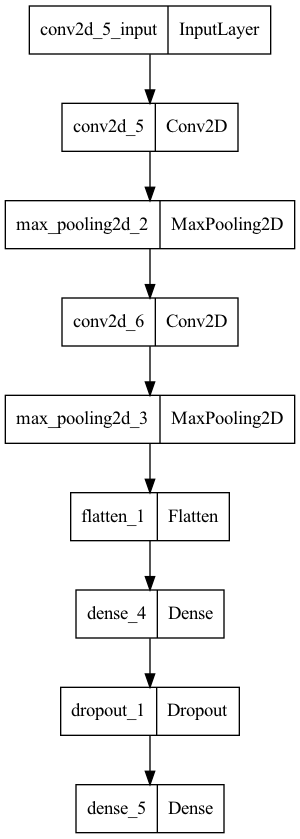

In [54]:
keras.utils.plot_model(model)

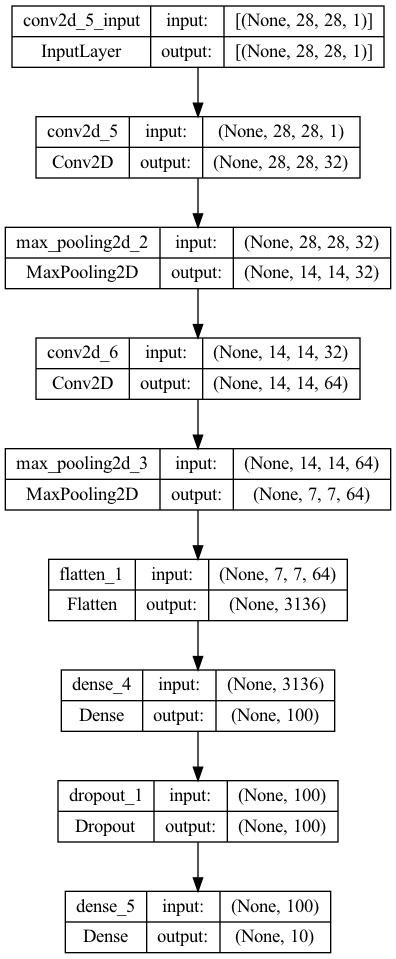

In [55]:
keras.utils.plot_model(model, show_shapes=True)

In [56]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data= (val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5337 - accuracy: 0.8102 - val_loss: 0.3402 - val_accuracy: 0.8767
Epoch 2/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3495 - accuracy: 0.8752 - val_loss: 0.2986 - val_accuracy: 0.8896
Epoch 3/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3018 - accuracy: 0.8908 - val_loss: 0.2727 - val_accuracy: 0.9041
Epoch 4/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2706 - accuracy: 0.9012 - val_loss: 0.2488 - val_accuracy: 0.9070
Epoch 5/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2460 - accuracy: 0.9091 - val_loss: 0.2364 - val_accuracy: 0.9136
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2267 - accuracy: 0.9161 - val_loss: 0.2563 - val_accuracy: 0.9043
Epoch 7/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2119 - accuracy: 0.9215 - val_loss: 0.2241 - va

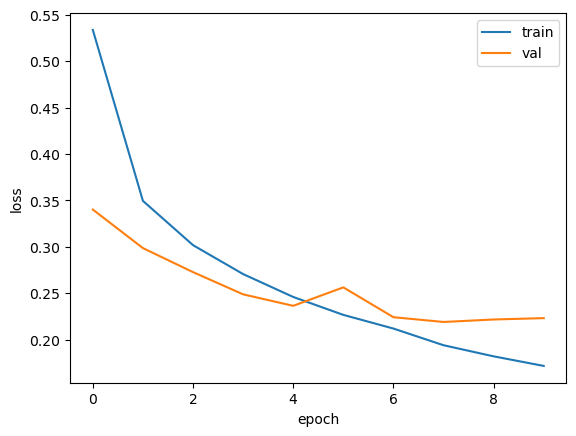

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [58]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2190 - accuracy: 0.9194


[0.21902477741241455, 0.9194166660308838]

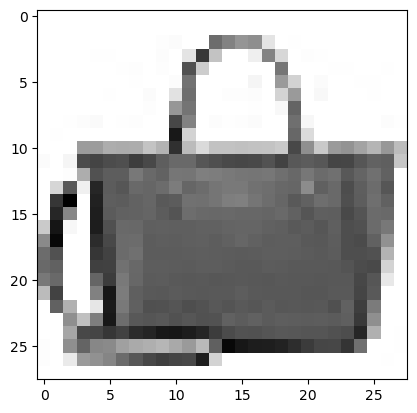

In [59]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [60]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 58ms/step
[[4.5993921e-16 9.2777245e-28 2.5042317e-19 4.7369801e-17 5.0590780e-17
  7.2959259e-15 3.0182211e-15 6.5210863e-17 1.0000000e+00 2.1037319e-16]]


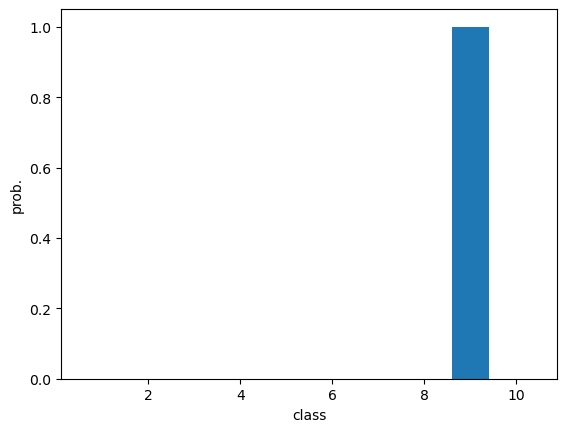

In [61]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [62]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달' ,'셔츠', '스니커즈', '가방', '앵클 부츠']

In [63]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [64]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [65]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2363 - accuracy: 0.9167


[0.2363283485174179, 0.916700005531311]

In [66]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [67]:
model.layers

In [68]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [69]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.023163304 0.2534638


In [70]:
print(conv_weights)

[[[[-3.88152665e-03 -1.48983389e-01 -3.47029120e-02 -1.76385701e-01
    -1.97587788e-01  1.51423682e-02 -3.81311849e-02  1.92580283e-01
     8.67504999e-03  1.92219820e-02 -1.33847728e-01  1.62343413e-01
     7.99215361e-02  1.90841228e-01 -1.42332643e-01  2.27522463e-01
     1.33635566e-01 -4.97821160e-02 -5.68002909e-02 -2.53791451e-01
     1.11049637e-01 -9.30635724e-03 -1.39730647e-01 -8.98619294e-02
    -5.78885861e-02  1.89849287e-01 -6.96317330e-02  5.82315447e-03
    -2.25472584e-01 -1.35896709e-02 -2.13567868e-01 -5.11015989e-02]]

  [[-7.69698247e-02 -3.17151278e-01 -9.23116878e-02 -9.66134891e-02
    -1.45372880e+00  1.08089581e-01  3.60831261e-01  1.68104514e-01
    -5.18813170e-02  1.47230431e-01  5.40706329e-02  9.67294276e-02
     3.69907208e-02 -4.57142014e-03  1.06839582e-01  2.81269938e-01
    -5.19447289e-02 -3.27179842e-02 -7.13510439e-03  2.40495279e-01
    -1.44110858e-01  4.11569178e-02 -1.16765566e-01  3.10830832e-01
    -2.04177037e-01  1.92623049e-01  1.054398

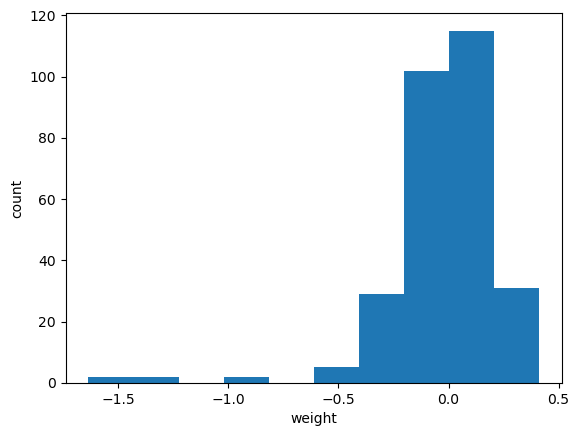

In [71]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))

plt.xlabel('weight')
plt.ylabel('count')
plt.show()

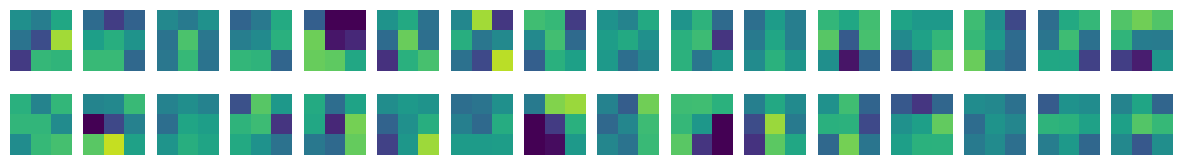

In [72]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i ,j].imshow(conv_weights[:, :, 0, i*16+j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [73]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same", input_shape = (28, 28, 1)))


In [74]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [75]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0049465494 0.08392036


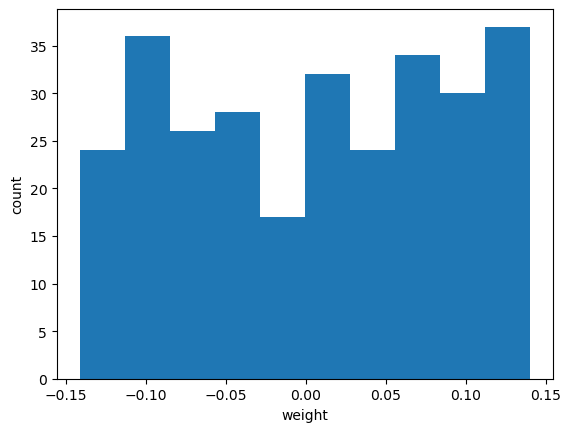

In [76]:
plt.hist(no_training_weights.reshape(-1, 1))

plt.xlabel('weight')
plt.ylabel('count')
plt.show()

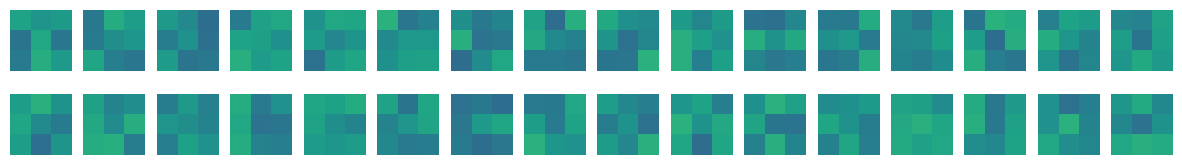

In [77]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i ,j].imshow(no_training_weights[:, :, 0, i*16+j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [78]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_5_input'), name='conv2d_5_input', description="created by layer 'conv2d_5_input'")


### 특성 맵 시각화

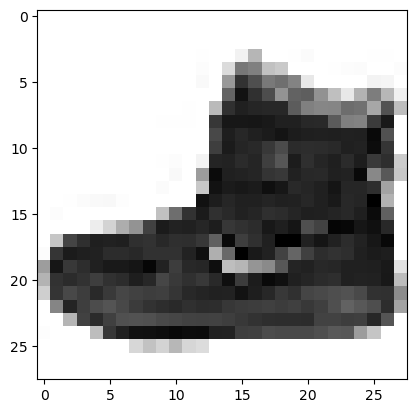

In [79]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [80]:
inputs = train_input[0:1].reshape(-1, 18, 18, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

ValueError: cannot reshape array of size 784 into shape (18,18,1)